In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.svm import SVC

# 2値判別のサポートベクトルマシン

In [4]:
from common import mlbench as ml
X,y = ml.twoDnormals(200, cl=2, sd=1)  # トレーニングデータ
sv = SVC(kernel="linear")
sv.fit(X,y)                                     # フィッティング
np.mean(sv.predict(X)!=y)        # トレーニング誤差の計算

0.089999999999999997

In [5]:
tX,ty = ml.twoDnormals(1000, cl=2, sd=1)   # テストデータ  
py = sv.predict(tX)    # 予測ラベル
np.mean(ty!=py)
1-sv.score(tX,ty)      # scoreで精度を計算．

0.09099999999999997

# カーネル・サポートベクトルマシン

In [6]:
X,y = ml.spirals(300, cycles=1,sd=0.15)       # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1,sd=0.15)     # テストデータ

In [7]:
# 2次多項式カーネル
sv2 = SVC(kernel="poly",degree=2,gamma=1,coef0=1)
sv2.fit(X,y)              # フィッティング
1-sv2.score(tX,ty)        # テスト誤差

0.46899999999999997

In [8]:
# 3次多項式カーネル
sv3 = SVC(kernel="poly",degree=3,gamma=1,coef0=1)
sv3.fit(X,y)              # フィッティング
1-sv3.score(tX,ty)        # テスト誤差

0.25

In [11]:
# 判別境界のプロット
from common.contourFittedClass import cplot                       # 等高線プロット用関数 (contourFittedClass.py)
X,y   = ml.spirals(300, cycles=1,sd=0.15)     # トレーニングデータ

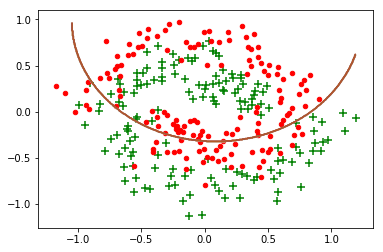

In [13]:
# 2次多項式カーネル
sv = SVC(kernel="poly",degree=2,gamma=1,coef0=1)
sv.fit(X,y) 
cplot(sv,X,y,h=0.005)

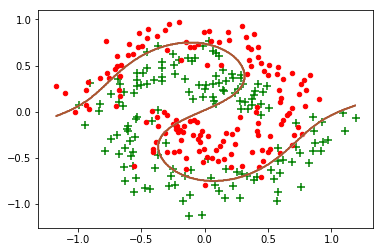

In [14]:
# 3次多項式カーネル
sv = SVC(kernel="poly",degree=3,gamma=1,coef0=1)
sv.fit(X,y) 
cplot(sv,X,y,h=0.005)

# モデルパラメータの選択

In [15]:
from sklearn.model_selection import cross_validate
X,y = ml.twoDnormals(300, cl=2, sd=1)   # トレーニングデータ(2D混合正規)
# K-重交差検証法(K=5)：gamma=0.1, C=1のときの検証誤差を計算
sv = SVC(kernel="rbf",gamma=0.1,C=1)         # SVM(ガウスカーネル)
cv = cross_validate(sv, X, y, scoring='accuracy', cv=5)
cv['test_score']                             # テスト誤差の推定結果を表示

array([ 0.95081967,  0.98333333,  0.88333333,  0.86666667,  0.89830508])

In [16]:
np.mean(cv['test_score'])       # 交差検証法による精度の推定

0.91649161804204871

In [17]:
1-np.mean(cv['test_score'])     # 検証誤差

0.083508381957951294

In [18]:
from scipy.spatial import distance
X,y = ml.spirals(200, cycles=1.2, sd=0.16)  # トレーニングデータ
dm = distance.pdist(X)                           # 距離行列の計算
# 距離の分位点からgammaの候補値を設定
cg = 1/np.percentile(dm,np.arange(1,100,2))**2 
cg

array([ 60.19865559,  21.51146205,  12.91685477,   9.19085602,
         7.13927505,   5.85265762,   4.88704636,   4.21776055,
         3.65463648,   3.24308413,   2.92047932,   2.6391806 ,
         2.39148575,   2.19722301,   2.01918085,   1.8617727 ,
         1.72541964,   1.60716463,   1.50035166,   1.39838808,
         1.3108961 ,   1.23258564,   1.16331042,   1.10055878,
         1.0362432 ,   0.98281646,   0.93093939,   0.88089086,
         0.8367971 ,   0.79517395,   0.75889864,   0.71729408,
         0.68040551,   0.64752427,   0.61327815,   0.5847172 ,
         0.55686625,   0.53083879,   0.50525329,   0.47875697,
         0.45467288,   0.43249244,   0.4090979 ,   0.38665714,
         0.36476029,   0.33918564,   0.31409423,   0.28592758,
         0.256703  ,   0.21094626])

In [19]:
ncv = 5                           # K=5でK-重交差検証法を実行
cvg = np.array([])
for g in cg:                      # 各gammaごとに検証誤差を計算
    sv = SVC(kernel="rbf", gamma=g, C=1)
    cv = cross_validate(sv,X,y,scoring='accuracy',cv=ncv)
    cvg = np.r_[cvg,np.mean(cv['test_score'])]
cverr = 1-cvg                         # 検証誤差
opt_gamma = cg[np.argmin(cverr)]      # 最適なgamma
opt_gamma

60.198655587636964

In [20]:
X,y   = ml.spirals(300, cycles=1,sd=0.15)     # トレーニングデータ
tX,ty = ml.spirals(1000,cycles=1,sd=0.15)     # テストデータ

テスト誤差:  0.489


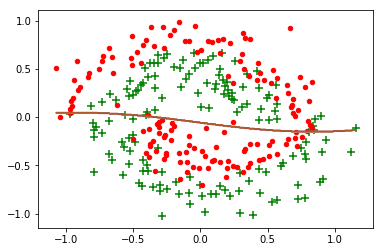

In [21]:
sv = SVC(kernel="rbf",C=1,gamma=cg.min())
sv.fit(X,y)                                           # フィッティング
print("テスト誤差: ", 1-sv.score(tX,ty))            
cplot(sv,X,y,h=0.005)

テスト誤差:  0.169


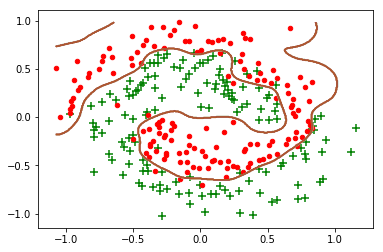

In [22]:
sv = SVC(kernel="rbf",C=1,gamma=opt_gamma)
sv.fit(X,y)                                    # フィッティング
print('テスト誤差: ', 1-sv.score(tX,ty))            
cplot(sv,X,y,h=0.005)

テスト誤差:  0.169


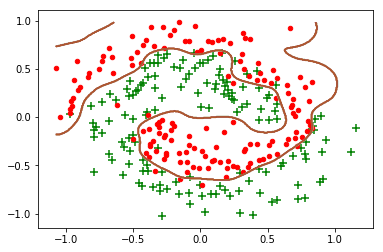

In [23]:
sv = SVC(kernel="rbf",C=1,gamma=cg.max())
sv.fit(X,y)            # フィッティング
print('テスト誤差: ',1-sv.score(tX,ty))          
cplot(sv,X,y,h=0.005)

# 多値判別

In [24]:
G = 8                                   # 8クラスの多値判別
X,y   = ml.twoDnormals(500, cl=G,sd=0.8)  # トレーニングデータ
tX,ty = ml.twoDnormals(1000,cl=G,sd=0.8)  # テストデータ

In [25]:
# 一対一法のサポートベクトルマシンで多値判別
# 線形カーネル
svlin = SVC(kernel='linear',decision_function_shape='ovo')
svlin.fit(X,y)         # フィッティング
1-svlin.score(tX,ty)   # テスト誤差

0.18000000000000005

In [26]:
# ガウスカーネル
svrbf = SVC(kernel='rbf',decision_function_shape='ovo')
svrbf.fit(X,y)         # フィッティング
1-svrbf.score(tX,ty)   # テスト誤差

0.18999999999999995

In [28]:
# 手書き文字認識   
from scipy.spatial import distance           # distanceを使う
# データ読込
tr = pd.read_csv('data/optdigits_train.csv').values
te = pd.read_csv('data/optdigits_test.csv').values
X,y = tr[:,:64], tr[:,64]
tX,ty = te[:,:64], te[:,64]

In [29]:
# 線形カーネルで学習
svlin = SVC(kernel='linear',decision_function_shape='ovo')
svlin.fit(X,y)
1-svlin.score(X,y)     # トレーニング誤差

0.0

In [30]:
1-svlin.score(tX,ty)   # テスト誤差

0.03897550111358572

In [31]:
# ガウスカーネルによる学習
# 一部のデータを使ってヒューリスティクスで gamma を設定．
pX = X[np.random.choice(X.shape[0],round(X.shape[0]/10)),:]
g = 1/np.median(distance.pdist(pX))**2     # 距離行列からgammaの値を設定
g

0.0004135649296939619

In [32]:
svrbf = SVC(kernel='rbf',decision_function_shape='ovo',gamma=g)
svrbf.fit(X,y)
1-svrbf.score(X,y)       # トレーニング誤差

0.0070643642072213408

In [33]:
1-svrbf.score(tX,ty)     # テスト誤差

0.024498886414253906

In [34]:
# ガウスカーネルのカーネル幅を変更
g = 0.01
svrbf = SVC(kernel='rbf',decision_function_shape='ovo',gamma=g)
svrbf.fit(X,y)
1-svrbf.score(X,y)       # トレーニング誤差

0.0

In [35]:
1-svrbf.score(tX,ty)     # テスト誤差

0.26113585746102452